In [ ]:
#!pip install catboost
!pip install -U scikit-learn
#!pip install sklego
!pip install pycaret-nightly
from pycaret.utils import enable_colab 
!pip install pyts
!pip install sktime
!pip install tsmoothie


     |████████████████████████████████| 22.2MB 1.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 266kB 13.1MB/s 
     |████████████████████████████████| 157.5MB 55kB/s 
     |████████████████████████████████| 65.8MB 77kB/s 
     |████████████████████████████████| 1.6MB 50.6MB/s 
     |████████████████████████████████| 174kB 62.2MB/s 
     |████████████████████████████████| 276kB 55.3MB/s 
     |████████████████████████████████| 6.8MB 51.9MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 245kB 58.5MB/s 
     |████████████████████████████████| 1.8MB 50.9MB/s 
     |████████████████████████████████| 14.2MB 50.3MB/s 
     |████████████████████████████████| 2.1MB 56.0MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 3.1MB 67.0MB/s 
   

     |████████████████████████████████| 2.5MB 14.4MB/s 
     |████████████████████████████████| 5.7MB 9.0MB/s 
     |████████████████████████████████| 9.5MB 52.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# load libraries and modules

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sktime.classification.compose *
from sktime.classification.dictionary_based import BOSSEnsemble
#from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import *
from sktime.transformations.panel.compose import ColumnConcatenator
#from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.transformations.panel.rocket import *
from pyts.classification import * 
from sktime.classification.shapelet_based import *
from sktime.utils.slope_and_trend import _slope
from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor
from sktime.classification.interval_based import RandomIntervalSpectralForest
from sktime.classification.dictionary_based._boss import *
from sktime.classification.dictionary_based import *

from tsmoothie.smoother import LowessSmoother


In [ ]:
import pandas as pd 
import os 
from google.colab import files, drive
import glob
import re 
import datetime
import numpy as np 
import pandas as pd 
from collections import Counter 
from catboost import *
from matplotlib import pyplot as plt
from sklearn.experimental.enable_hist_gradient_boosting import *
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.utils import *
from sklearn.preprocessing import *
from sklearn.dummy import * 
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.neural_network import * 
from sklearn.tree import * 
from sklearn.ensemble import *
from sklearn.compose import * 
from sklearn.preprocessing import * 
from sklearn.model_selection import *
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from lightgbm import * 
from xgboost import *
from sklearn.linear_model import *
from sklearn.dummy import *
#from sklego.pandas_utils import *
#from sklego.meta import GroupedPredictor
#from sklego.meta import GroupedEstimator
from pyts.classification import * 
from pyts.datasets import *

In [ ]:
def anscombe(x):
    '''
    Compute the anscombe variance stabilizing transform.
      the input   x   is noisy Poisson-distributed data
      the output  fx  has variance approximately equal to 1.
    Reference: Anscombe, F. J. (1948), "The transformation of Poisson,
    binomial and negative-binomial data", Biometrika 35 (3-4): 246-254
    '''
    return 2.0*np.sqrt(x + 3.0/8.0)

def inverse_anscombe(z):
    '''
    Compute the inverse transform using an approximation of the exact
    unbiased inverse.
    Reference: Makitalo, M., & Foi, A. (2011). A closed-form
    approximation of the exact unbiased inverse of the Anscombe
    variance-stabilizing transformation. Image Processing.
    '''
    return (z/2.0)**2 - 3.0/8.0

def identity(x):
  return x 

In [ ]:
drive.mount("MyDrive")
os.chdir("MyDrive")
os.chdir("MyDrive")
os.listdir()

Mounted at MyDrive


# read csv file 

In [ ]:
#files.upload()
#data1 = pd.read_csv("NIFTY_2017.csv", header = [0], index_col = 0)
data2 = pd.read_csv("NIFTY_2018.csv", header = [0], index_col = 0)
data3 = pd.read_csv("NIFTY_2019.csv", header = [0], index_col = 0)

In [ ]:
data = pd.concat([data2, data3])


In [ ]:
unique_dates = np.unique(data.Date)
#print(unique_dates)
unique_dates = list(unique_dates)
#print(unique_dates[0])
TS = [] 
for d in unique_dates[0:]:
 ts = data[data.Date == d].Close.values
 TS.append(ts)
#TS[0]


In [ ]:
lens_of_ts = [len(ts) for ts in TS]
Counter(lens_of_ts) 
#TS

Counter({63: 2,
         372: 1,
         373: 1,
         375: 39,
         376: 1,
         377: 34,
         378: 291,
         379: 116,
         380: 6})

In [ ]:
print("total number of series", len(TS))
drops = [] 
for i in range(len(TS)):
  if lens_of_ts[i] < 372:
    drops.append(i)


total number of series 491


In [ ]:
drops
TS.pop(drops[0])
TS.pop(drops[1] - 1)
# TS.pop(drops[2] - 2)
# TS.pop(drops[3] - 3)

array([11662.25, 11661.1 , 11652.3 , 11639.1 , 11627.85, 11637.1 ,
       11641.2 , 11640.25, 11644.3 , 11644.9 , 11639.6 , 11639.3 ,
       11636.3 , 11635.85, 11637.15, 11636.3 , 11636.4 , 11638.25,
       11642.  , 11643.15, 11643.35, 11642.6 , 11636.3 , 11632.85,
       11633.05, 11633.  , 11635.6 , 11638.15, 11639.45, 11639.9 ,
       11639.45, 11639.1 , 11638.75, 11638.5 , 11638.6 , 11640.55,
       11640.6 , 11642.3 , 11641.5 , 11640.7 , 11639.35, 11636.65,
       11634.6 , 11632.3 , 11631.45, 11632.3 , 11626.45, 11607.55,
       11611.9 , 11619.4 , 11621.95, 11622.85, 11623.7 , 11625.2 ,
       11627.55, 11627.55, 11628.6 , 11629.15, 11626.45, 11627.  ,
       11629.55, 11628.  , 11627.15])

In [ ]:
lens_of_ts = [len(ts) for ts in TS]
Counter(lens_of_ts) 


Counter({372: 1, 373: 1, 375: 39, 376: 1, 377: 34, 378: 291, 379: 116, 380: 6})

In [ ]:
feats = []
for i in range(len(TS)):
  feats.append(TS[i][:int(5 * 60)])

feats = np.stack(feats)
feats.shape
normed_features = []
for i in range(len(feats)):
  normed_features.append(feats[i] - feats[i][0])

normed_features = [n/100 for n in normed_features]
#normed_features

In [ ]:
targets = [] 
for i in range(len(TS)):
  targets.append(TS[i][-1]) #last term in the series is the target 
targets
print(len(targets))
targets = np.array(targets)
binary_response = [] 
for i in range(len(targets)):
  if targets[i] > feats[i][0]:  #see if the last term is greater than the first term 
    binary_response.append(1)
  else:
    binary_response.append(0)

binary_response = np.array(binary_response)
binary_response.shape
binary_response = binary_response[:,np.newaxis]

489


In [ ]:
D = np.concatenate([normed_features,binary_response], axis = -1)
D = pd.DataFrame(D)
cols = list(D.columns)
cols = ["F" + str(col) for col in cols]
cols[-1] = "Target"
cols
D.columns = cols

In [ ]:
D.drop(columns = ["F0"], inplace = True)
D

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,...,F261,F262,F263,F264,F265,F266,F267,F268,F269,F270,F271,F272,F273,F274,F275,F276,F277,F278,F279,F280,F281,F282,F283,F284,F285,F286,F287,F288,F289,F290,F291,F292,F293,F294,F295,F296,F297,F298,F299,Target
0,-0.0850,-0.0570,-0.0910,-0.1040,-0.0800,-0.0520,-0.0140,0.0160,-0.0120,-0.0320,-0.0420,-0.0380,-0.0560,-0.0790,-0.0840,-0.1140,-0.1170,-0.1100,-0.1290,-0.1480,-0.1070,-0.1170,-0.1260,-0.1300,-0.1230,-0.1010,-0.1080,-0.0850,-0.0870,-0.0790,-0.0800,-0.0870,-0.078,-0.0680,-0.0650,-0.0540,-0.0570,-0.0640,-0.0640,-0.0570,...,-0.1690,-0.1790,-0.1690,-0.1740,-0.1820,-0.1850,-0.1920,-0.1900,-0.1940,-0.192,-0.1910,-0.1970,-0.1970,-0.1920,-0.1900,-0.1820,-0.1820,-0.1800,-0.1970,-0.1940,-0.195,-0.1970,-0.1870,-0.1720,-0.1800,-0.1630,-0.1930,-0.1590,-0.1420,-0.1470,-0.1600,-0.1590,-0.1620,-0.1640,-0.1340,-0.1290,-0.1230,-0.1210,-0.0970,0.0
1,0.1300,0.1560,0.1510,0.0660,-0.0020,0.0020,-0.0280,-0.0460,-0.0970,-0.1100,-0.0530,-0.0650,-0.0750,-0.0500,-0.0170,-0.0370,-0.0520,-0.0850,-0.1420,-0.2010,-0.1690,-0.2150,-0.1720,-0.2510,-0.4030,-0.4220,-0.3580,-0.3190,-0.3200,-0.3020,-0.2520,-0.3250,-0.382,-0.4630,-0.4770,-0.4250,-0.3950,-0.3770,-0.3920,-0.3950,...,-0.3840,-0.3720,-0.3890,-0.3970,-0.4020,-0.4070,-0.3950,-0.3810,-0.3750,-0.345,-0.3280,-0.3250,-0.3200,-0.3220,-0.3170,-0.3930,-0.3780,-0.3810,-0.4020,-0.4080,-0.406,-0.4420,-0.4620,-0.4880,-0.5220,-0.5950,-0.5570,-0.5340,-0.5270,-0.5730,-0.5170,-0.4450,-0.4970,-0.4850,-0.5320,-0.5170,-0.5010,-0.5100,-0.5430,0.0
2,-0.0710,-0.1310,-0.1750,-0.1420,-0.1220,-0.1240,-0.1120,-0.0950,-0.0850,-0.1160,-0.0840,-0.1030,-0.1550,-0.1220,-0.1120,-0.2170,-0.1890,-0.1720,-0.1940,-0.1640,-0.1720,-0.1370,-0.1210,-0.1220,-0.1590,-0.1610,-0.1690,-0.1550,-0.1450,-0.1560,-0.1400,-0.1100,-0.068,-0.0290,0.0030,0.0260,-0.0020,-0.0240,-0.0350,-0.0300,...,-0.1070,-0.0940,-0.0940,-0.0890,-0.1160,-0.1260,-0.1420,-0.1150,-0.1240,-0.174,-0.1600,-0.1570,-0.1640,-0.1490,-0.1820,-0.1840,-0.1800,-0.1550,-0.1450,-0.1230,-0.108,-0.1390,-0.1150,-0.1020,-0.0790,-0.0770,-0.0870,-0.1100,-0.1030,-0.0810,-0.0820,-0.0810,-0.0940,-0.1030,-0.1000,-0.1180,-0.1310,-0.1040,-0.1340,0.0
3,-0.0540,-0.0940,-0.0490,-0.0970,-0.1630,-0.2040,-0.1960,-0.2550,-0.2450,-0.2540,-0.1830,-0.1960,-0.1610,-0.1510,-0.1180,-0.1990,-0.1750,-0.1690,-0.1520,-0.1220,-0.1590,-0.1370,-0.1250,-0.1140,-0.1240,-0.0790,-0.0610,-0.1040,-0.0740,-0.0940,-0.1030,-0.1110,-0.097,-0.1340,-0.0900,-0.0840,-0.0690,-0.0640,-0.0720,-0.0990,...,0.0280,0.0500,0.0640,0.0740,0.0930,0.1140,0.2040,0.1810,0.1560,0.154,0.1580,0.1590,0.1730,0.1810,0.1940,0.2190,0.2460,0.2060,0.2070,0.2230,0.231,0.2200,0.2090,0.2050,0.2140,0.2320,0.2610,0.2590,0.2540,0.2380,0.2360,0.2080,0.0640,0.1060,0.1210,0.1490,0.1550,0.2090,0.1750,1.0
4,-0.0480,-0.0600,-0.0480,-0.0600,0.0220,0.0070,0.0340,0.0390,0.0300,0.0270,0.0240,0.0290,0.0080,0.0280,0.0650,0.1120,0.1370,0.1320,0.1270,0.1250,0.1390,0.1350,0.1770,0.1630,0.1610,0.1400,0.1040,0.0940,0.0770,0.1100,0.1400,0.1260,0.166,0.1720,0.1700,0.2010,0.1920,0.2020,0.1970,0.1800,...,0.0200,0.0330,0.0280,0.0720,0.0570,0.0660,0.0970,0.0900,0.0820,0.082,0.0900,0.0780,0.0800,0.0870,0.0970,0.1080,0.1390,0.1160,0.1270,0.1190,0.118,0.1270,0.1250,0.1350,0.1310,0.1320,0.1260,0.1020,0.1070,0.0870,0.0650,0.0520,0.0950,0.1170,0.1250,0.1370,0.1370,0.1520,0.1570,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,-0.0465,-0.0085,-0.0170,0.0575,0.0470,0.0525,0.1015,0.0965,0.0695,0.0905,0.0740,0.0515,0.0485,0.0985,0.0905,0.0910,0.0985,0.1425,0.1145,0.1110,0.0845,0.0795,0.0530,0.0230,0.0415,0.0885,0.0560,0.0515,0.0490,0.0900,0.0310,0.0235,0.038,-0.0

In [ ]:
Dtargs = D.iloc[:,-1] 
Dtargs

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
484    0.0
485    0.0
486    1.0
487    0.0
488    0.0
Name: Target, Length: 489, dtype: float64

In [ ]:
smoother = LowessSmoother(smooth_fraction=0.05, iterations=4)

sdata = smoother.smooth(D.iloc[:,:-1])
smoothed_features = sdata.smooth_data

In [ ]:
Dsmooth = pd.DataFrame(smoothed_features)
D_smoothed = pd.concat([Dsmooth, Dtargs], axis = 1)

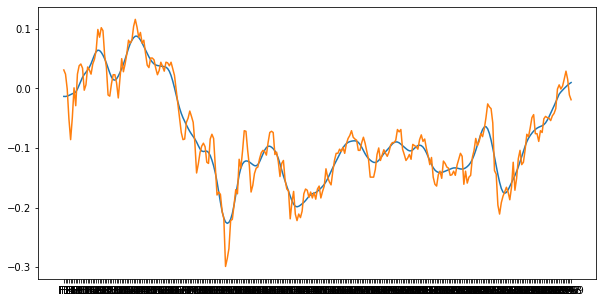

In [ ]:
j = 66
plt.figure(figsize = (10,5))
plt.plot(smoothed_features[j])
plt.plot(D.iloc[j,:-1])

In [ ]:
Dtrain, Dtest = train_test_split(D_smoothed, train_size = 0.80, shuffle = False)
Dtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,Target
0,-0.087921,-0.080214,-0.072694,-0.065534,-0.058896,-0.052837,-0.047195,-0.041314,-0.039432,-0.040124,-0.044387,-0.052155,-0.062451,-0.073907,-0.084853,-0.094379,-0.102563,-0.109536,-0.115024,-0.118614,-0.120257,-0.119932,-0.117881,-0.114591,-0.110489,-0.106034,-0.101584,-0.097050,-0.092068,-0.086814,-0.081778,-0.077398,-0.073802,-0.070809,-0.068154,-0.065244,-0.061620,-0.057579,-0.053867,-0.051060,...,-0.176594,-0.176349,-0.177118,-0.178812,-0.181101,-0.183595,-0.185965,-0.188103,-0.189880,-0.191072,-0.191474,-0.191206,-0.190700,-0.190275,-0.190069,-0.190029,-0.189916,-0.189447,-0.188603,-0.187549,-0.186551,-0.185322,-0.183307,-0.180228,-0.176346,-0.172226,-0.168493,-0.165398,-0.162569,-0.159509,-0.155905,-0.151752,-0.146459,-0.141097,-0.135681,-0.130130,-0.124395,-0.118454,-0.112293,0.0
1,0.147128,0.120205,0.093951,0.068490,0.043781,0.019660,-0.004184,-0.028330,-0.042949,-0.052267,-0.057151,-0.059750,-0.062366,-0.066588,-0.073179,-0.082621,-0.094921,-0.110661,-0.131556,-0.158597,-0.189803,-0.221103,-0.248976,-0.271440,-0.288242,-0.301417,-0.313616,-0.326362,-0.339045,-0.349982,-0.357937,-0.364105,-0.370933,-0.379213,-0.388091,-0.396130,-0.401911,-0.404345,-0.403449,-0.401983,...,-0.374385,-0.378064,-0.381463,-0.383700,-0.383903,-0.381666,-0.377156,-0.370859,-0.363648,-0.356884,-0.351635,-0.348534,-0.348033,-0.350288,-0.355169,-0.362747,-0.373090,-0.385866,-0.400899,-0.418198,-0.436731,-0.454990,-0.472198,-0.488507,-0.502891,-0.513955,-0.521344,-0.525000,-0.525525,-0.523713,-0.520193,-0.515870,-0.514430,-0.513250,-0.512364,-0.511886,-0.511833,-0.512192,-0.512965,0.0
2,-0.127688,-0.125666,-0.123557,-0.121567,-0.119803,-0.118253,-0.116695,-0.114166,-0.112543,-0.113199,-0.117102,-0.123524,-0.131621,-0.140435,-0.148808,-0.155576,-0.160137,-0.162377,-0.162643,-0.161773,-0.160271,-0.157893,-0.154956,-0.152440,-0.150298,-0.148105,-0.145178,-0.140265,-0.132146,-0.120083,-0.104845,-0.088296,-0.072280,-0.057757,-0.045012,-0.033778,-0.024093,-0.016348,-0.010096,-0.003242,...,-0.114477,-0.113567,-0.113000,-0.113828,-0.116510,-0.121027,-0.126909,-0.133334,-0.139801,-0.146040,-0.151829,-0.156694,-0.160224,-0.161850,-0.161202,-0.158616,-0.154788,-0.150096,-0.144062,-0.136445,-0.127773,-0.119235,-0.112040,-0.106396,-0.101884,-0.097988,-0.094660,-0.092211,-0.091140,-0.091853,-0.093930,-0.096524,-0.100080,-0.103677,-0.107405,-0.111308,-0.115397,-0.119655,-0.124041,0.0
3,-0.063232,-0.083883,-0.103814,-0.122830,-0.140846,-0.157926,-0.174333,-0.190605,-0.196262,-0.198243,-0.196983,-0.193057,-0.187018,-0.179318,-0.171138,-0.163974,-0.158482,-0.154307,-0.150412,-0.145654,-0.139124,-0.131177,-0.122730,-0.115129,-0.108876,-0.103984,-0.100219,-0.097751,-0.096618,-0.096233,-0.096011,-0.095596,-0.094824,-0.093607,-0.092119,-0.090629,-0.088981,-0.087399,-0.086248,-0.085702,...,0.058094,0.067956,0.079877,0.093009,0.106514,0.119604,0.131844,0.143137,0.153340,0.162530,0.170736,0.177551,0.183094,0.188386,0.194467,0.200919,0.206839,0.211597,0.214890,0.217044,0.218948,0.221241,0.224080,0.227250,0.230192,0.231559,0.229897,0.224945,0.217081,0.207151,0.196435,0.186407,0.180368,0.174100,0.167665,0.161505,0.155971,0.151306,0.147634,1.0
4,-0.055094,-0.044161,-0.033599,-0.023487,-0.013835,-0.004519,0.004696,0.014241,0.020956,0.027654,0.034999,0.043342,0.052868,0.063191,0.074218,0.085941,0.098435,0.111249,0.123275,0.132929,0.138764,0.140543,0.139171,0.136367,0.133476,0.130897,0.128906,0.127732,0.127763,0.129772,0.134511,0.141984,0.151369,0.161135,0.169645,0.175954,0.180021,0.182417,0.183623,0.183861,...,0.035516,0.039899,0.045654,0.052380,0.059534,0.066278,0.071971,0.076605,0.080354,0.083591,0.086873,0.090444,0.094141,0.097946,0.101975,0.106146,0.110373,0.114656,0.118716,0.122085,0.124337,0.1251

# sktime section


## Creating sktime data

In [ ]:
Xtrain_sktime = pd.DataFrame()
train_series_holder = []
for i in range(len(Dtrain)): 
   series = Dtrain.iloc[i,:-1].values
   series = pd.Series(series)
   train_series_holder.append(series)
Xtrain_sktime["dim0"] = train_series_holder
Xtrain_sktime

,dim0
0,0 -0.087921 1 -0.080214 2 -0.07269...
1,0 0.147128 1 0.120205 2 0.09395...
2,0 -0.127688 1 -0.125666 2 -0.12355...
3,0 -0.063232 1 -0.083883 2 -0.10381...
4,0 -0.055094 1 -0.044161 2 -0.03359...
...,...
386,0 -0.104321 1 -0.110104 2 -0.11245...
387,0 -0.215663 1 -0.220527 2 -0.22487...
388,0 -0.052456 1 -0.020034 2 0.01102...
389,0 0.062537 1 0.051695 2 0.04078...


In [ ]:
Xtest_sktime = pd.DataFrame()
test_series_holder = []
for i in range(len(Dtest)): 
   series = Dtest.iloc[i,:-1].values
   series = pd.Series(series)
   test_series_holder.append(series)
Xtest_sktime["dim0"] = test_series_holder
Xtest_sktime

,dim0
0,0 -0.120596 1 -0.151784 2 -0.18256...
1,0 -0.356718 1 -0.359980 2 -0.36343...
2,0 0.526297 1 0.577197 2 0.62728...
3,0 -0.058018 1 -0.079853 2 -0.10278...
4,0 0.074243 1 0.047033 2 0.02082...
...,...
93,0 -0.014659 1 -0.001568 2 0.01090...
94,0 0.034412 1 0.021494 2 0.00865...
95,0 0.016320 1 0.010084 2 0.00385...
96,0 -0.034147 1 -0.032443 2 -0.03078...


In [ ]:
ytrain_sktime = Dtrain.iloc[:,-1]
ytrain_sktime.shape
ytest_sktime = Dtest.iloc[:,-1]
print(Xtrain_sktime.shape, ytrain_sktime.shape)

(391, 1) (391,)


## mrseql classifier

In [ ]:
ms = MrSEQLClassifier(seql_mode = "clf", symrep = ["sfa", "sax"])
ms.fit(Xtrain_sktime, ytrain_sktime)
predicted = ms.predict(Xtest_sktime)
print("Accuracy with mr-seql: %2.3f" % accuracy_score(ytest_sktime, predicted))
print("Matthews CC:%2.3f" % matthews_corrcoef(ytest_sktime, predicted))

KeyboardInterrupt: ignored

## rocket classifier

In [ ]:
rocket = MiniRocket(random_state = 2468)  # by default, ROCKET uses 10,000 kernels
trainx_transform = rocket.fit_transform(Xtrain_sktime)
trainx_transform.shape
valx_transform = rocket.transform(Xtest_sktime)

clf = RidgeClassifierCV(alphas = np.logspace(-4,4, num = 100), normalize = True)
clf.fit(trainx_transform, ytrain_sktime)
predicted = clf.predict(valx_transform)
print("Accuracy with Rocket: %2.3f" % accuracy_score(ytest_sktime, predicted))
print("Matthews CC:%2.3f" % matthews_corrcoef(ytest_sktime, predicted))

Accuracy with Rocket: 0.847
Matthews CC:0.693


## time series forest classifier

In [ ]:
steps = [
    (
        "extract",
        RandomIntervalFeatureExtractor(
            n_intervals = "sqrt", features=[np.mean, np.std, _slope]
        ),
    ),
    ("clf", DecisionTreeClassifier()),
]
time_series_tree = Pipeline(steps)

tsf = TimeSeriesForestClassifier(
    estimator=time_series_tree,
    n_estimators = 100,
    criterion = "entropy",
    bootstrap = True,
    oob_score = True,
    random_state = 2222,
    n_jobs=-1,
)


tsf.fit(Xtrain_sktime, ytrain_sktime)
tsf.score(Xtest_sktime, ytest_sktime)
print("Accuracy: {:.3f}".format(accuracy_score(ytest_sktime, tsf.predict(Xtest_sktime))))
print("MCC: {:.3f}".format(matthews_corrcoef(ytest_sktime, tsf.predict(Xtest_sktime))))
#print("AUC ROC", roc_auc_score(ytest_sktime, tsf.predict(Xtest_sktime)))
#print("F1 score", f1_score(ytest_sktime, tsf.predict(Xtest_sktime)))

Accuracy: 0.857
MCC: 0.713


## other sktime learners


In [ ]:
tsf = RandomIntervalSpectralForest(n_estimators = 50)
tsf.fit(Xtrain_sktime, ytrain_sktime)
tsf.score(Xtest_sktime, ytest_sktime)
print("Accuracy:  ", accuracy_score(ytest_sktime, tsf.predict(Xtest_sktime)))
print("MCC:  ", matthews_corrcoef(ytest_sktime, tsf.predict(Xtest_sktime)))
print("AUC ROC", roc_auc_score(y_test, tsf.predict(Xtest_sktime)))
print("F1 score", f1_score(ytest_sktime, tsf.predict(Xtest_sktime)))

In [ ]:
tsf = IndividualBOSS(window_size = 80, word_length = 6, norm = False, alphabet_size = 3)
tsf.fit(Xtrain_sktime, ytrain_sktime)
tsf.score(Xtest_sktime, ytest_sktime)
print("Accuracy:  ", accuracy_score(ytest_sktime, tsf.predict(Xtest_sktime)))
print("MCC:  ", matthews_corrcoef(ytest_sktime, tsf.predict(Xtest_sktime)))
print("AUC ROC", roc_auc_score(ytest_sktime, tsf.predict(Xtest_sktime)))
print("F1 score", f1_score(ytest_sktime, tsf.predict(Xtest_sktime)))

Accuracy:   0.7551020408163265
MCC:   0.5053204750958046
AUC ROC 0.750104821802935
F1 score 0.7209302325581395


In [ ]:
tsf = WEASEL()
tsf.fit(Xtrain_sktime, ytrain_sktime)
tsf.score(Xtest_sktime, ytest_sktime)
print("Accuracy:  ", accuracy_score(ytest_sktime, tsf.predict(Xtest_sktime)))
print("MCC:  ", matthews_corrcoef(ytest_sktime, tsf.predict(Xtest_sktime)))
print("AUC ROC", roc_auc_score(ytest_sktime, tsf.predict(Xtest_sktime)))
print("F1 score", f1_score(ytest_sktime, tsf.predict(Xtest_sktime)))

# regular and pyts methods



In [ ]:
X_train = Dtrain.iloc[:,:-1] 
X_test = Dtest.iloc[:,:-1]
y_train = Dtrain.iloc[:,-1]
y_test = Dtest.iloc[:,-1]
print(X_train.shape, y_train.shape)

(391, 299) (391,)


In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298
18,-0.166407,-0.164924,-0.164377,-0.164563,-0.165191,-0.166022,-0.166937,-0.168714,-0.175474,-0.183223,-0.190516,-0.196281,-0.200783,-0.204623,-0.208477,-0.213011,-0.219183,-0.227494,-0.237229,-0.247512,-0.257218,-0.265363,-0.270575,-0.271937,-0.269388,-0.263653,-0.255540,-0.245868,-0.235007,-0.222981,-0.210780,-0.199504,-0.189412,-0.180361,-0.171750,-0.163018,-0.154320,-0.146134,-0.138916,-0.132330,...,-0.741481,-0.753966,-0.764906,-0.773109,-0.777222,-0.775813,-0.768667,-0.757503,-0.744368,-0.729835,-0.713533,-0.695506,-0.676072,-0.655114,-0.632723,-0.609562,-0.586295,-0.562455,-0.537897,-0.513055,-0.489180,-0.468885,-0.454314,-0.445513,-0.441124,-0.439714,-0.439952,-0.440815,-0.441698,-0.442486,-0.442111,-0.438955,-0.432473,-0.420819,-0.407957,-0.394917,-0.381944,-0.369047,-0.356126,-0.343023
311,-0.079362,-0.045394,-0.011981,0.020691,0.052456,0.083365,0.113713,0.144091,0.165232,0.181504,0.192118,0.196655,0.196936,0.194594,0.190161,0.183687,0.175689,0.166966,0.158252,0.150001,0.143089,0.138347,0.134751,0.130909,0.126576,0.122842,0.121240,0.121310,0.120828,0.118072,0.113065,0.107120,0.101740,0.097764,0.094969,0.093159,0.091890,0.091193,0.091748,0.094422,...,0.058505,0.069620,0.081928,0.093580,0.103162,0.109700,0.113315,0.114391,0.112808,0.107888,0.099419,0.088443,0.076363,0.064734,0.054423,0.045054,0.036381,0.028769,0.023328,0.020745,0.021437,0.025178,0.030059,0.033476,0.034443,0.033516,0.030866,0.026313,0.018923,0.008165,-0.004553,-0.016715,-0.026135,-0.028131,-0.029706,-0.031273,-0.032662,-0.033639,-0.033999,-0.033643
85,-0.317436,-0.303108,-0.288661,-0.274281,-0.260153,-0.246422,-0.233012,-0.219019,-0.206976,-0.197385,-0.190783,-0.187344,-0.187004,-0.189044,-0.192184,-0.195724,-0.199926,-0.205430,-0.212574,-0.221518,-0.232888,-0.246974,-0.262677,-0.278275,-0.292734,-0.306069,-0.318641,-0.330293,-0.340488,-0.349199,-0.357190,-0.365108,-0.373212,-0.381574,-0.389439,-0.395168,-0.397234,-0.395084,-0.389242,-0.380627,...,-0.512304,-0.521876,-0.529527,-0.534898,-0.538106,-0.539408,-0.538951,-0.536856,-0.533468,-0.529539,-0.525654,-0.522167,-0.519033,-0.516386,-0.514042,-0.511521,-0.508388,-0.504693,-0.501056,-0.498092,-0.495909,-0.493971,-0.491308,-0.486830,-0.479935,-0.471223,-0.462104,-0.453685,-0.445834,-0.437997,-0.430010,-0.422355,-0.415753,-0.410818,-0.406288,-0.401847,-0.397298,-0.392561,-0.387626,-0.382507


In [ ]:
y_train.head(3)

18     0.0
311    1.0
85     0.0
Name: Target, dtype: float64

In [ ]:
# saxmod = SAXVSM(window_size = 50, word_size = 5, n_bins = 4, window_step = 5,
#                 strategy='uniform')

for clf in [
            LGBMClassifier(), 
            XGBClassifier(),
            # LogisticRegression(), 
            # KNeighborsClassifier(),
            # RidgeClassifier(), 
            # MLPClassifier()
            ]:
  #X_train, y_train = shuffle(X_train, y_train)
  clf.fit(X_train, y_train)

  preds = clf.predict(X_test)
  preds.shape, y_test.shape
  print("accuracy {:.3f}".format(accuracy_score(y_test,preds)))
  print()
  print("MCC {:.3f}".format(matthews_corrcoef(y_test, preds)))
  print("------------------------------------------------------------")
  #print("AUC ROC", roc_auc_score(y_test, preds))

accuracy 0.837

MCC 0.673
------------------------------------------------------------
[21:40:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy 0.847

MCC 0.692
------------------------------------------------------------


# keras TCN section

In [ ]:
!pip install keras-tcn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm
from keras.callbacks import *
from keras.optimizers import * 
from tcn import TCN

In [ ]:
trainx = X_train.values[:,:,np.newaxis]
trainx.shape
valx = X_test.values[:,:,np.newaxis]
print(valx.shape, y_test.shape)
trainy = y_train
valy = y_test

(98, 299, 1) (98,)


In [ ]:
i = Input(shape=(trainx.shape[-2], 1))
m = TCN()(i)
m = Dense(1, activation = 'sigmoid')(m)
 
early_stopping = EarlyStopping(patience = 50, restore_best_weights=True, min_delta = 0.000)
reduceLR = ReduceLROnPlateau(factor = 0.5, patience = 5, min_delta = 0.01)

model = Model(inputs=[i], outputs=[m])
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = 1e-3))
model.reset_states()
model.fit(trainx, trainy, 
          validation_data = (valx, y_test),
          shuffle = True,
          callbacks = [early_stopping, reduceLR],
          batch_size = 64,
          epochs = 200)


Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 299, 1)]          0         
_________________________________________________________________
tcn_16 (TCN)                 (None, 64)                91136     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 3s 86ms/step - loss: 1.3130 - val_loss: 0.3674
Epoch 2/200
7/7 [==============================] - 0s 16ms/step - loss: 0.3729 - val_loss: 0.2808
Epoch 3/200
7/7 [==============================] - 0s 17ms/step - loss: 0.4447 - val_loss: 0.3674
Epoch 4/200
7/7 [==============================] - 0s 15ms/step - loss: 0.3540 - val_loss:

In [ ]:
preds = model.predict(valx)
preds = np.round(preds)
print("MCC {:.3f}".format(matthews_corrcoef(y_test, preds)))
print("Acc {:.3f}".format(accuracy_score(y_test, preds)))

MCC 0.715
Acc 0.857


# pycaret section


In [ ]:
from pycaret.classification import * 
experiment = setup(data = D,
                   #train_size = 0.80,
                   #test_data = Dtest,
                   #pca = True,
                   #pca_method = "linear",
                   #pca_components = .90,
                   #feature_selection = True, 
                   #remove_multicollinearity = True, 
                   #feature_selection_method = "boruta",
                   #feature_interaction = True, 
                   data_split_shuffle = True,
                   #create_clusters = True,
                   target = "Target",
                   #normalize = True, 
                   silent = True)

,Description,Value
0,session_id,6560
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(489, 240)"
5,Missing Values,False
6,Numeric Features,239
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fca9b74c488>
Traceback (most recent call last):
  File "/usr/lib/python3.6/weakref.py", line 356, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


In [ ]:
get_config("X_train")

In [ ]:
mods = compare_models(
    
                      fold = ShuffleSplit(n_splits = 3),
                      #cross_validation = False,
                      #include = [SGDClassifier(),LogisticRegressionCV(cv = 5), LogisticRegression()],
                      n_select = 5, 
                      turbo = False, 
                      sort = "MCC",
                      round = 2)

IntProgress(value=0, description='Processing: ', max=94)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:22:02
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Gaussian Process Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rbfsvm,SVM - Radial Kernel,0.77,0.84,0.73,0.74,0.73,0.53,0.54,0.05
nb,Naive Bayes,0.75,0.80,0.77,0.70,0.73,0.50,0.51,0.02
knn,K Neighbors Classifier,0.75,0.81,0.73,0.71,0.72,0.49,0.50,0.49
et,Extra Trees Classifier,0.75,0.81,0.71,0.72,0.71,0.49,0.50,0.32
gpc,Gaussian Process Classifier,0.74,0.81,0.73,0.69,0.71,0.47,0.47,0.15
rf,Random Forest Classifier,0.74,0.82,0.70,0.70,0.69,0.46,0.47,0.38
lr,Logistic Regression,0.73,0.83,0.72,0.69,0.70,0.46,0.46,0.80
gbc,Gradient Boosting Classifier,0.73,0.80,0.73,0.68,0.70,0.45,0.46,0.38
xgboost,Extreme Gradient Boosting,0.72,0.80,0.70,0.67,0.68,0.43,0.43,15.95
ada,Ada Boost Classifier,0.71,0.79,0.76,0.64,0.69,0.42,0.43,0.13


KeyboardInterrupt: ignored

In [ ]:
evaluate_model(mods[0])

In [ ]:
#!pip install shap
interpret_model(mods[0])

In [ ]:
predict_model(mods[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.788,0.8199,0.7654,0.7561,0.7607,0.5705,0.5705


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F45,F50,F52,F54,F56,F59,F68,F75,F78,F81,F83,F89,F94,F103,F112,F116,F183,F198,F219,F231,F234,F235,F237,Target,Label,Score
0,0.0470,-0.0885,-0.0415,0.0365,0.0895,0.1230,0.1995,0.1835,0.1825,0.2130,0.1920,0.1660,0.1945,0.1880,0.1575,0.0905,0.1095,0.1295,0.1365,0.1860,0.1605,0.1610,0.1450,0.1960,0.2255,0.2125,0.2130,0.1805,0.1605,0.1955,0.1975,0.2600,0.3035,0.3280,0.3020,0.2955,0.3440,0.3410,0.3585,0.3975,0.5145,0.4870,0.5100,0.4760,0.5270,0.4995,0.4580,0.4405,0.4035,0.3750,0.3890,0.2875,0.3205,0.3175,0.2690,0.3545,0.4745,0.4225,0.5090,0.5240,0.4765,0.4950,0.5255,0.5240,0.5400,1.0,1.0,1.0
1,-0.0755,-0.1120,-0.0790,-0.0820,-0.0730,-0.0545,-0.0780,-0.0795,-0.0415,-0.0305,-0.0205,-0.0150,-0.0575,-0.1520,-0.1495,-0.2855,-0.2960,-0.3360,-0.2640,-0.3045,-0.3460,-0.4020,-0.3565,-0.3800,-0.4365,-0.4320,-0.4980,-0.4660,-0.3880,-0.3575,-0.2925,-0.3310,-0.2955,-0.3130,-0.3380,-0.4075,-0.4540,-0.4410,-0.3350,-0.3655,-0.3705,-0.4005,-0.3490,-0.4040,-0.3320,-0.3295,-0.2995,-0.3210,-0.3055,-0.3485,-0.3920,-0.3890,-0.3960,-0.4125,-0.4745,-0.5035,-0.3710,-0.4250,-0.4375,-0.4495,-0.3330,-0.3285,-0.3375,-0.3115,-0.2770,0.0,0.0,1.0
2,0.1210,0.0125,0.1050,0.1580,0.1545,0.1610,0.2520,0.2230,0.2595,0.2480,0.2930,0.3205,0.2930,0.2570,0.2635,0.2525,0.2320,0.2180,0.2270,0.1735,0.1830,0.1625,0.1915,0.2000,0.1920,0.2180,0.2010,0.2100,0.1850,0.2310,0.1670,0.1905,0.2225,0.2575,0.2850,0.2855,0.3185,0.3155,0.3275,0.3275,0.2800,0.3045,0.3225,0.3345,0.3880,0.4040,0.3840,0.3955,0.4780,0.4360,0.4250,0.3745,0.3275,0.3080,0.2505,0.2180,0.2215,0.2210,0.2640,0.3625,0.4030,0.4325,0.4620,0.4530,0.4565,1.0,1.0,1.0
3,-0.1905,-0.3080,-0.2900,-0.2620,-0.3055,-0.4175,-0.3425,-0.4060,-0.3805,-0.4125,-0.5160,-0.5405,-0.4815,-0.4500,-0.3875,-0.3370,-0.3560,-0.3365,-0.3165,-0.2580,-0.2865,-0.2965,-0.2445,-0.2115,-0.2400,-0.2780,-0.2585,-0.2600,-0.3335,-0.3160,-0.2920,-0.2890,-0.2780,-0.2655,-0.3120,-0.2725,-0.2875,-0.3180,-0.3095,-0.3565,-0.4020,-0.4150,-0.5040,-0.4435,-0.4005,-0.3385,-0.4060,-0.3355,-0.3435,-0.3715,-0.4200,-0.4595,-0.4520,-0.4065,-0.3365,-0.3655,-0.4360,-0.3840,-0.0970,-0.0880,-0.1815,-0.2760,-0.1825,-0.2055,-0.1750,1.0,0.0,0.6
4,0.0405,0.1685,0.0920,0.1830,0.1865,0.1730,0.1330,0.1565,0.1635,0.1675,0.2155,0.1765,0.1875,0.1315,0.0955,0.1210,0.1365,0.1765,0.1815,0.1785,0.2165,0.2235,0.2300,0.1805,0.1600,0.1495,0.1135,0.0840,0.1145,0.1055,0.1180,0.1360,0.0955,0.1145,0.1055,0.1100,0.1235,0.1445,0.1190,0.1205,0.1070,0.1155,0.1210,0.1095,0.1415,0.1775,0.1575,0.1765,0.0750,0.0650,0.0255,0.0855,0.0820,0.1305,0.1150,0.1710,0.1130,0.0625,0.0385,0.0365,0.0585,0.0220,0.0360,0.0430,0.0505,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.0465,-0.0085,-0.0170,0.0575,0.0470,0.0525,0.1015,0.0965,0.0695,0.0905,0.0740,0.0515,0.0485,0.0985,0.0905,0.0910,0.0985,0.1425,0.1145,0.1110,0.0845,0.0795,0.0530,0.0230,0.0415,0.0885,0.0560,0.0515,0.0490,0.0900,0.0310,0.0235,0.0380,-0.0005,-0.0185,-0.0115,-0.0395,-0.0270,-0.0445,-0.0240,-0.0205,-0.0190,-0.0640,-0.0315,-0.0330,-0.0690,-0.0640,-0.0785,-0.0895,-0.1520,-0.1410,-0.1585,-0.1515,-0.1230,-0.1720,-0.2265,-0.1905,-0.1925,-0.2030,-0.3050,-0.2025,-0.2025,-0.2030,-0.1930,-0.2040,0.0,0.0,1.0
180,0.0155,0.0870,-0.0200,-0.0325,-0.0445,-0.0135,-0.0180,-0.0405,-0.0820,-0.0800,-0.1065,-0.1160,-0.1255,-0.1075,-0.0650,-0.0560,-0.0230,0.0140,0.0285,0.0385,0.0415,0.0020,0.0095,0.0150,0.0140,-0.0225,-0.0445,-0.0295,-0.0095,-0.0160,-0.0005,0.0275,0.0460,0.0195,0.0260,0.0245,0.0165,-0.0005,0.0100,0.0085,0.0110,-0.0015,-0.0210,-0.0235,-0.0045,-0.0010,-0.0050,-0.0110,0.0150,-0.0355,-0.0475,-0.0920,-0.0755,-0.0815,-0.0935,-0.1825,-0.1440,-0.1460,-0.2690,-0.2

In [ ]:
blender = blend_models([mods[0], mods[1]], 
                       fold = 2,
                       #cross_validation = False
                       )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7806,0.8806,0.7191,0.7805,0.7485,0.5545,0.556
1,0.8000,0.8950,0.7416,0.8049,0.7719,0.5944,0.596
Mean,0.7903,0.8878,0.7303,0.7927,0.7602,0.5745,0.576
SD,0.0097,0.0072,0.0112,0.0122,0.0117,0.0199,0.020


In [ ]:
predict_model(mods[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7857,0.8725,0.7111,0.8,0.7529,0.5649,0.568


,F1,F2,F238,Target,Label,Score
0,-0.1925,-0.1020,-0.0445,1.0,0.0,0.5412
1,-0.3225,-0.4265,-0.3545,0.0,0.0,0.7778
2,0.4250,0.6075,1.3860,1.0,1.0,0.9922
3,-0.1605,-0.1290,-0.0190,0.0,0.0,0.5181
4,0.0570,0.0625,-0.2425,1.0,0.0,0.6883
...,...,...,...,...,...,...
93,-0.0465,-0.0085,-0.2075,0.0,0.0,0.6667
94,0.0155,0.0870,-0.3560,0.0,0.0,0.7663
95,0.0115,0.0120,0.4215,1.0,1.0,0.8125
96,-0.1015,-0.0085,-0.4520,0.0,0.0,0.8233
